# Clustering and dimensionality reduction
Based on  Breast Cancer Wisconsin (Diagnostic) dataset located at ../data/breast+cancer+wisconsin+diagnostic
Load the data and split into train and test sets 80% for training and 20% for testing.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import minmax_scale
from scipy.stats import multivariate_normal

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [26]:
file_path = '../data/breast+cancer+wisconsin+diagnostic/wdbc.data'
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)
print("Basic Statistics:")
print(data.describe())
malignant = data[data['Diagnosis'] == 'M']
benign = data[data['Diagnosis'] == 'B']
print("\n First 5 malignant of the data:")
print(malignant.head())
print("\n First 5 benign of the data:")
print(benign.head())

Basic Statistics:
                 ID   Feature_1   Feature_2   Feature_3    Feature_4  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

        Feature_5   Feature_6   Feature_7   Feature_8   Feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.00

In [27]:
X = data.iloc[:, 2:]  # All features
Y = data['Diagnosis']  # Target variable (Diagnosis)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Checking the shape of the created datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
Y_train shape: (455,)
Y_test shape: (114,)


### Task 4: PCA
Use PCA to reduce the data (without the class labels) from 30 di-mensions to 2 dimensions and produce a scatter plot of this 2-dimensional data using colours to indicate the class label of each data point.

In [138]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
# vaiance in first component
print("Variance: ", pca.explained_variance_)
# variance ratio
print("Variance: ", pca.explained_variance_ratio_)


X_train_pca shape: (455, 2)
X_test_pca shape: (114, 2)
Variance:  [444052.67048931   7298.09325567]
Variance:  [0.98183264 0.01613661]


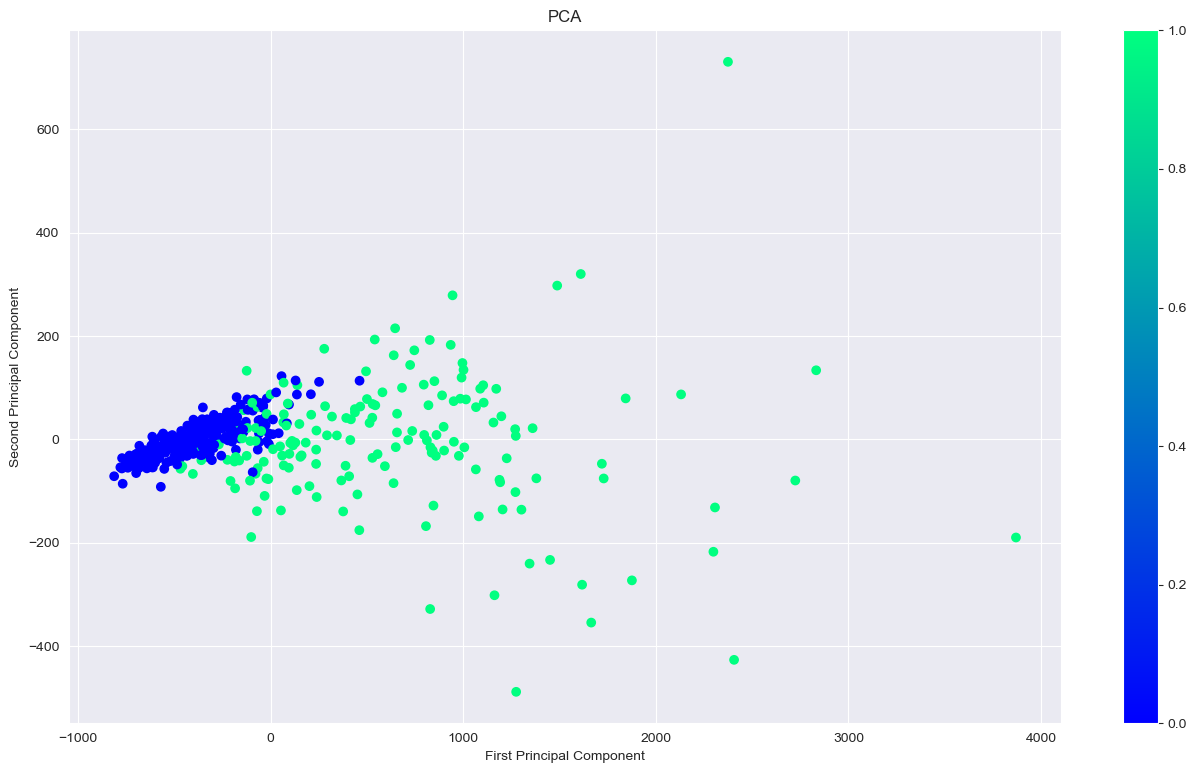

In [140]:
## plot the data
plt.figure(figsize=(16, 9))
numeric = {'M': 1, 'B': 0}
Y_train_numeric= Y_train.map(numeric)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train_numeric, cmap='winter')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.title('PCA')
plt.show()

### Task 5: Gaussian Mixture Model
Fit a Gaussian Mixture Model with 2 components using the 2-dimensional data and display the soft clusters using a scatter plot.The colour of each point in the scatter plot should represent the responsibilities associated with that point—so there will be more than 2 colours in scatter plot.  

In [184]:
def plot_GMM_mixture_components(X, Y_train_numeric, gmm, K):
    plt.figure(figsize=(16,9))
    plt.scatter(X[:, 0], X[:, 1], c=Y_train_numeric, s=20, cmap='plasma')
    plt.colorbar()
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    # Generate grid for contour plots
    x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 1000)
    y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 1000)
    X_grid, Y_grid = np.meshgrid(x, y)
    XX = np.array([X_grid.ravel(), Y_grid.ravel()]).T

    colours = ['red', 'green', 'blue']  # Make sure this has at least K colors

    for i in range(K):
        mean, covariance = gmm.means_[i], gmm.covariances_[i]
        gaussian = multivariate_normal(mean, covariance)
        Z = -gaussian.logpdf(XX).reshape(X_grid.shape)
        # Contour plot
        plt.contour(X_grid, Y_grid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), colors=colours[i])



Iteration 1:
Estimated means: [[0.09634028 0.40286339]
 [0.31890681 0.39616771]]
Estimated covariances: [[[ 0.00202372  0.00097247]
  [ 0.00097247  0.00080885]]

 [[ 0.02205654 -0.00085567]
  [-0.00085567  0.01259911]]]


E:\envis\Anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\lzh\AppData\Local\Temp\ipykernel_41592\3173435956.py:20: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(X_grid, Y_grid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), colors=colours[i])


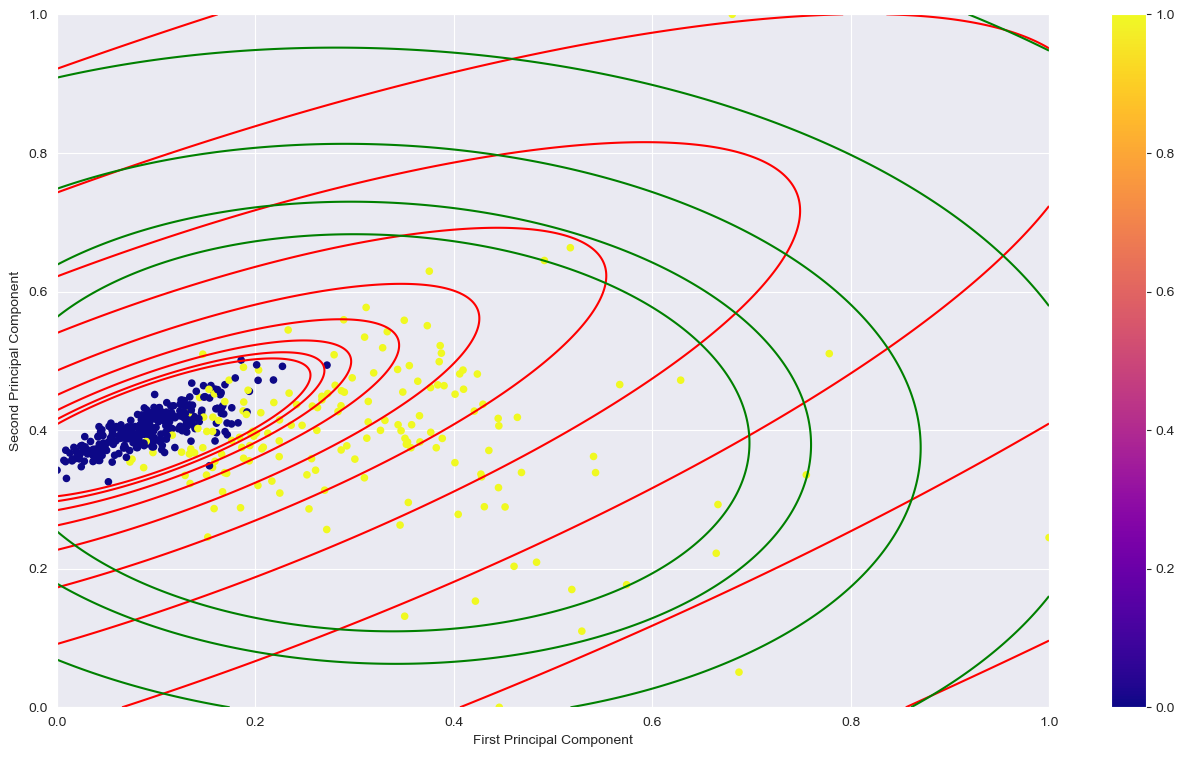

Converged!


In [185]:
# Normalize the PCA components
X_train_norm = minmax_scale(X_train_pca)

# Initialize GMM
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit GMM
iteration = 0
max_iterations = 100  # Prevent infinite loop
while iteration < max_iterations:
    iteration += 1
    print(f'\nIteration {iteration}:')
    gmm.fit(X_train_norm)
    print(f'Estimated means: {gmm.means_}')
    print(f'Estimated covariances: {gmm.covariances_}')
    plot_GMM_mixture_components(X_train_norm, Y_train_numeric, gmm, 2)
    plt.show()
    if gmm.converged_:
        print("Converged!")
        break

E:\envis\Anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\lzh\AppData\Local\Temp\ipykernel_41592\3173435956.py:20: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(X_grid, Y_grid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), colors=colours[i])


Converged: True
Estimated means: [[0.09634028 0.40286339]
 [0.31890681 0.39616771]]
Estimated covariances: [[[ 0.00202372  0.00097247]
  [ 0.00097247  0.00080885]]

 [[ 0.02205654 -0.00085567]
  [-0.00085567  0.01259911]]]


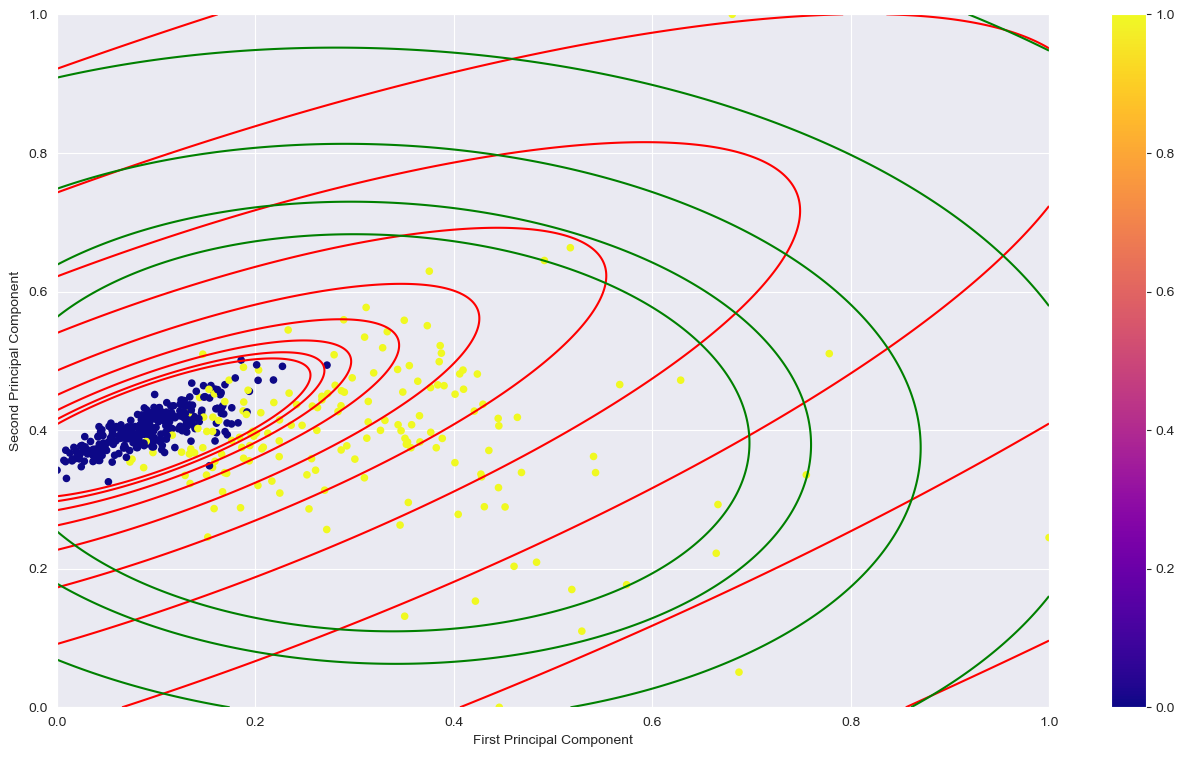

In [186]:
# Normalize the PCA components
X_train_pca_norm = minmax_scale(X_train_pca)

# Initialize GMM
gmm = GaussianMixture(n_components=2)

# Fit GMM
gmm.fit(X_train_pca_norm)
print("Converged:", gmm.converged_)
print("Estimated means:", gmm.means_)
print("Estimated covariances:", gmm.covariances_)

# Plot the GMM mixture components
plot_GMM_mixture_components(X_train_pca_norm, Y_train_numeric, gmm, 2)

### Task 6: Identify the main differences between them and explain these differences. See report

### Task 7: Classification with SVMs
Use an SVM approach to learn a classifier from the first 450 datapoints of the Breast Cancer Wisconsin (Diagnostic) dataset and report its accuracy on the last 118 datapoints.

Attempt to maximise the test set accuracy by choosing an appropriate kernel and appropriate degree of regularisation. 

In [102]:
# learn a classifier from the first 450 datapoints
# normalize the X_train, X_test, Y_train, Y_test

X_train_svm = minmax_scale(X)
# TODO：split


X_train_svm = minmax_scale(X_train)
X_test_svm = minmax_scale(X_test)
numeric = {'M': 1, 'B': 0}
Y_train_svm = Y_train.map(numeric)
Y_test_svm = Y_test.map(numeric)
# Checking the shape of the created datasets
print("X_svm shape:", X_train_svm.shape)
print("Y_svm shape:", Y_train_svm.shape)
print("X_test_svm shape:", X_test_svm.shape)
print("Y_test_svm shape:", Y_test_svm.shape)

X_svm shape: (455, 30)
Y_svm shape: (455,)
X_test_svm shape: (114, 30)
Y_test_svm shape: (114,)


#### 7.1: Test set accuracy with different kernels

In [159]:
svm_rbf = SVC(kernel='rbf', C=3)
svm_rbf.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_rbf.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_rbf.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.989010989010989
Accuracy on test set: 0.8596491228070176


In [160]:
svm_linear = SVC(kernel='linear', C=3)
svm_linear.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_linear.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_linear.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.9824175824175824
Accuracy on test set: 0.8947368421052632


In [161]:
svm_sig = SVC(kernel='sigmoid', C=3)
svm_sig.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_sig.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_sig.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.2879120879120879
Accuracy on test set: 0.4298245614035088


In [162]:
svm_ploy = SVC(kernel='poly', C=3)
svm_ploy.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_ploy.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_ploy.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.9912087912087912
Accuracy on test set: 0.8245614035087719


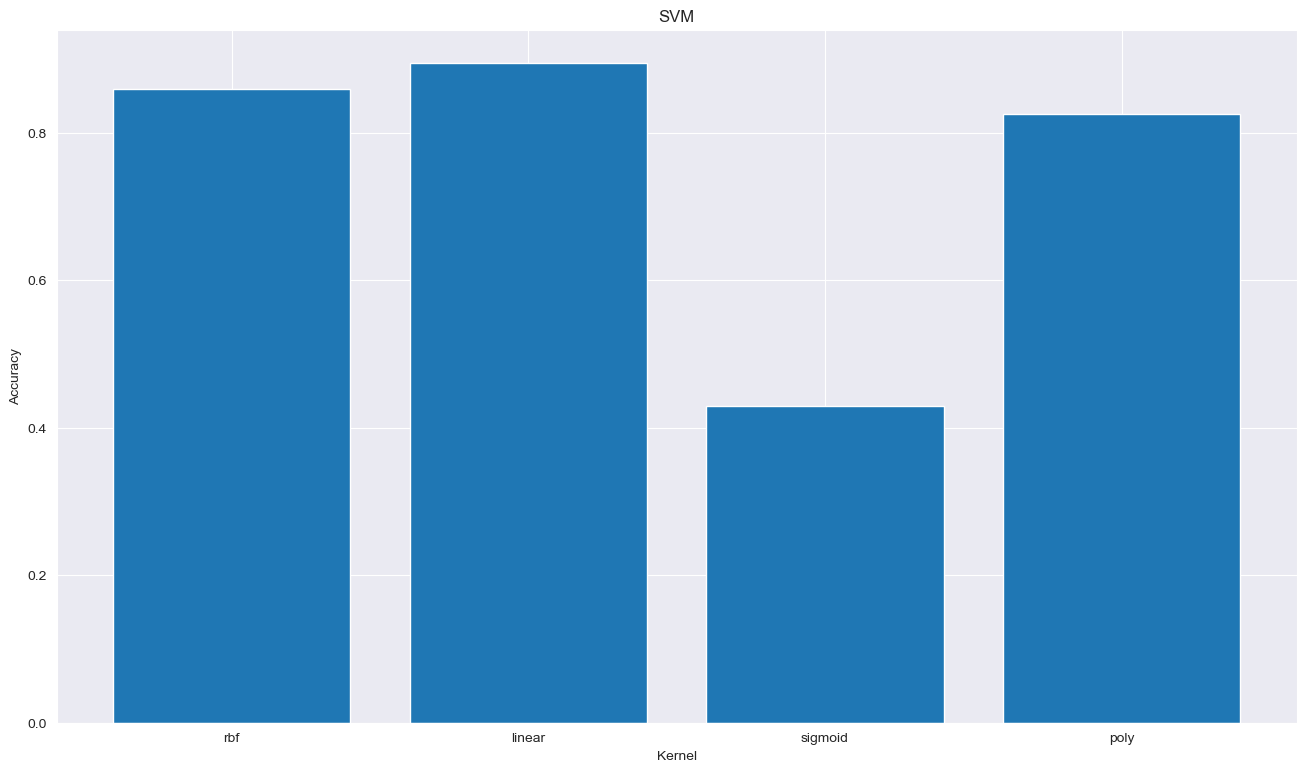

In [163]:
# plot the 4 different kernels with the best parameters and the accuracy
plt.figure(figsize=(16, 9))
plt.bar(['rbf', 'linear', 'sigmoid', 'poly'], [svm_rbf.score(X_test_svm, Y_test_svm), svm_linear.score(X_test_svm, Y_test_svm), svm_sig.score(X_test_svm, Y_test_svm), svm_ploy.score(X_test_svm, Y_test_svm)])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.show()

In [164]:
param = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly']}
svm = SVC()
grid_search = GridSearchCV(svm, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_svm, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'kernel': 'rbf'}
Best score:  0.9757900546067155


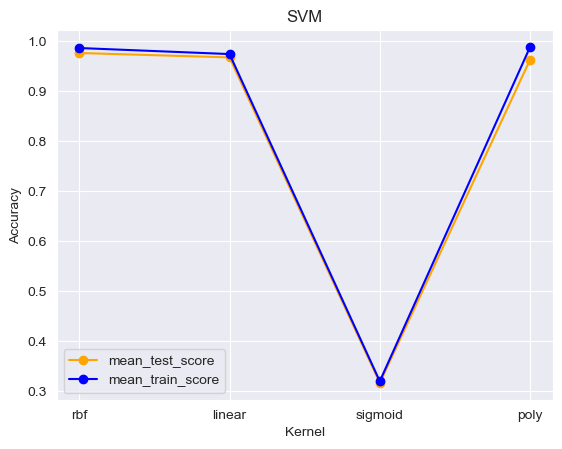

In [165]:
plt.figure()
plt.plot(param['kernel'], grid_search.cv_results_['mean_test_score'],'o-', color='orange', label='mean_test_score')
plt.plot(param['kernel'], grid_search.cv_results_['mean_train_score'],'o-', color='blue', label='mean_train_score')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()

In [166]:
svm_rbf = SVC(kernel='rbf', C=3)
svm_linear = SVC(kernel='linear', C=3)

scores_rbf = cross_val_score(svm_rbf, X_train_svm, Y_train_svm, cv=5, scoring='accuracy')
scores_linear = cross_val_score(svm_linear, X_train_svm, Y_train_svm, cv=5, scoring='accuracy')

print("RBF kernel accuracy on each fold:", scores_rbf)
print("RBF kernel mean cross-validation accuracy:", scores_rbf.mean())
print("Linear kernel accuracy on each fold:", scores_linear)
print("Linear kernel mean cross-validation accuracy:", scores_linear.mean())

RBF kernel accuracy on each fold: [0.98901099 0.96703297 0.98901099 0.98901099 0.96703297]
RBF kernel mean cross-validation accuracy: 0.9802197802197803
Linear kernel accuracy on each fold: [0.98901099 0.96703297 0.98901099 0.97802198 0.95604396]
Linear kernel mean cross-validation accuracy: 0.9758241758241759


#### 7.2: Test set accuracy with different C

In [167]:
C = [0.1, 0.20, 0.30, 0.40, 0.50, 1, 2, 3, 4]
param = {'C': C}
svm = SVC(kernel='rbf')

grid_search = GridSearchCV(svm, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_svm, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'C': 1}
Best score:  0.9757900546067155


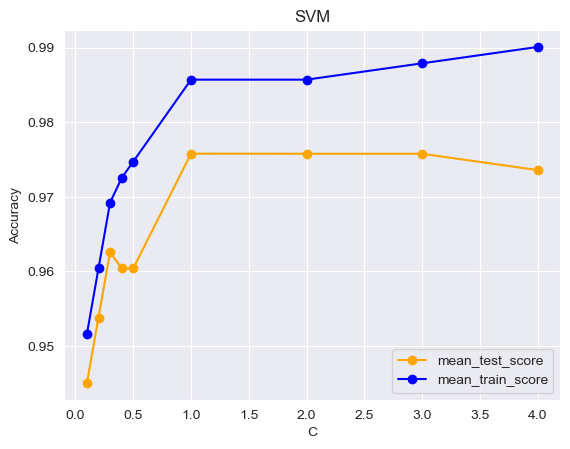

In [168]:
plt.figure()
plt.plot(C, grid_search.cv_results_['mean_test_score'],'o-', color='orange', label='mean_test_score')
plt.plot(C, grid_search.cv_results_['mean_train_score'],'o-', color='blue', label='mean_train_score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()

#### Task 8: Classification with SVMs and PCA
Use PCA to reduce the data (without the class labels) from 30 dimensions to 2 dimensions and use an SVM approach to learn a classifier from the training data and report its accuracy on the test data.

In [169]:
# we have already done the PCA in task 4, apply the SVM on the PCA data
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train_pca shape: (455, 2)
X_test_pca shape: (114, 2)
Y_train shape: (455,)
Y_test shape: (114,)


In [170]:
svm_rbf = SVC(kernel='rbf', C=3)
svm_rbf.fit(X_train_pca, Y_train_svm)
print("Accuracy on training set:", svm_rbf.score(X_train_pca, Y_train_svm))
print("Accuracy on test set:", svm_rbf.score(X_test_pca, Y_test_svm))

Accuracy on training set: 0.9164835164835164
Accuracy on test set: 0.9473684210526315


In [171]:
svm_linear = SVC(kernel='linear', C=3)
svm_linear.fit(X_train_pca, Y_train_svm)
print("Accuracy on training set:", svm_linear.score(X_train_pca, Y_train_svm))
print("Accuracy on test set:", svm_linear.score(X_test_pca, Y_test_svm))

Accuracy on training set: 0.9208791208791208
Accuracy on test set: 0.9649122807017544


In [172]:
svm_sig = SVC(kernel='sigmoid', C=3)
svm_sig.fit(X_train_pca, Y_train_svm)
print("Accuracy on training set:", svm_sig.score(X_train_pca, Y_train_svm))
print("Accuracy on test set:", svm_sig.score(X_test_pca, Y_test_svm))

Accuracy on training set: 0.8571428571428571
Accuracy on test set: 0.8947368421052632


In [173]:
svm_ploy = SVC(kernel='poly', C=3)
svm_ploy.fit(X_train_pca, Y_train_svm)
print("Accuracy on training set:", svm_ploy.score(X_train_pca, Y_train_svm))
print("Accuracy on test set:", svm_ploy.score(X_test_pca, Y_test_svm))

Accuracy on training set: 0.8505494505494505
Accuracy on test set: 0.8859649122807017


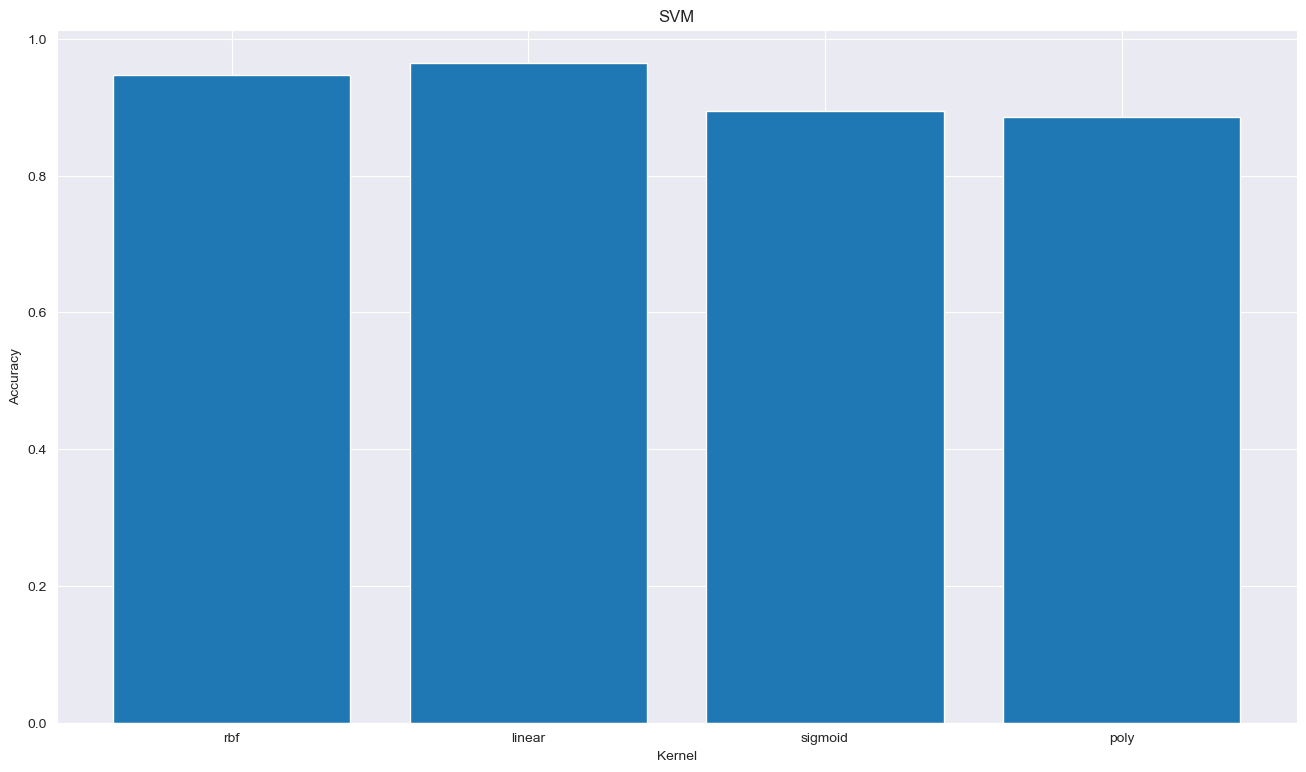

In [174]:
# plot the 4 different kernels with the best parameters and the accuracy
plt.figure(figsize=(16, 9))
plt.bar(['rbf', 'linear', 'sigmoid', 'poly'], [svm_rbf.score(X_test_pca, Y_test_svm), svm_linear.score(X_test_pca, Y_test_svm), svm_sig.score(X_test_pca, Y_test_svm), svm_ploy.score(X_test_pca, Y_test_svm)])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.show()

In [176]:
param = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly']}
svm = SVC()
grid_search = GridSearchCV(svm, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_pca, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'kernel': 'linear'}
Best score:  0.9186563262460788


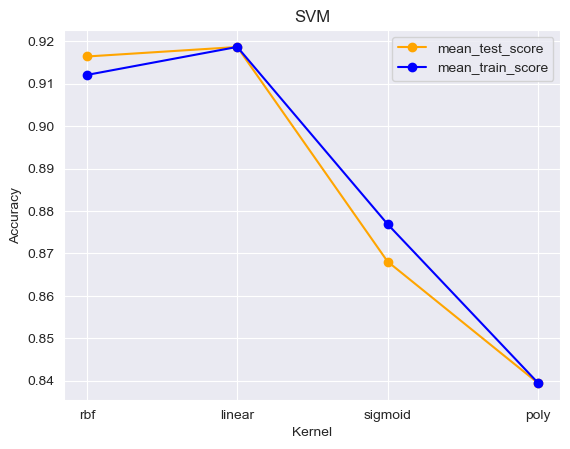

In [177]:
plt.figure()
plt.plot(param['kernel'], grid_search.cv_results_['mean_test_score'],'o-', color='orange', label='mean_test_score')
plt.plot(param['kernel'], grid_search.cv_results_['mean_train_score'],'o-', color='blue', label='mean_train_score')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()

### Task 9: Discuss to what extent, see report